In [1]:
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import cv2
from matplotlib import pyplot as plt
from qiskit.circuit.library import *
c4xgate = C4XGate()
c3xgate = C3XGate()
ccxgate = CCXGate()

In [ ]:
#本实验为颜色通道交换实验，与QRMW中有些不同，不过主体代码与LenaSample类似
#在制备完整个图像后，对颜色通道索引进行操控即可

In [2]:
picture_path = 'lenna.jpeg'

img = cv2.imread(picture_path, 1)

In [3]:
channel_B = cv2.resize(img[:, :, 0], (32,32))
channel_G = cv2.resize(img[:, :, 1], (32,32))
channel_R = cv2.resize(img[:, :, 2], (32,32))

In [4]:
channel_R.shape

(32, 32)

In [5]:
channel_R

array([[226, 223, 231, ..., 195, 198, 175],
       [229, 223, 228, ..., 198, 156,  92],
       [225, 231, 228, ..., 159,  97,  99],
       ...,
       [ 96, 185, 232, ..., 156, 146, 117],
       [159, 195, 229, ..., 126, 161, 114],
       [ 99, 224, 230, ..., 153, 135, 106]], dtype=uint8)

In [6]:
x = 32 
y = 32
index = x*y

channel_R_color_list = []
channel_R_index_list = []
channel_G_color_list = []
channel_G_index_list = []
channel_B_color_list = []
channel_B_index_list = []

for j in range(index):
    channel_R_index_list.append('00' + bin(j).replace('0b','').zfill(10))
    channel_G_index_list.append('01' + bin(j).replace('0b','').zfill(10))
    channel_B_index_list.append('10' + bin(j).replace('0b','').zfill(10))


for j in range(x):
    for k in range(y):
        channel_R_color_list.append(bin(channel_R[j][k]).replace('0b','').zfill(8))
        channel_G_color_list.append(bin(channel_G[j][k]).replace('0b','').zfill(8))
        channel_B_color_list.append(bin(channel_B[j][k]).replace('0b','').zfill(8))

In [7]:
gateValueMap_R = {}
gateValueMap_G = {}
gateValueMap_B = {}
for pos in range(index):
    for cindex in range(8):
        if channel_R_color_list[pos][cindex] == '1':
            key = channel_R_index_list[pos] + str(cindex)
            gateValueMap_R[key] = 1
        if channel_G_color_list[pos][cindex] == '1':
            key = channel_G_index_list[pos] + str(cindex)
            gateValueMap_G[key] = 1
        if channel_B_color_list[pos][cindex] == '1':
            key = channel_B_index_list[pos] + str(cindex)
            gateValueMap_B[key] = 1

In [8]:
keySet_R = gateValueMap_R.keys()
keySet_G = gateValueMap_G.keys()
keySet_B = gateValueMap_B.keys()

In [9]:
keySetList_R = []
keySetList_G = []
keySetList_B = []

for i in keySet_R:
    keySetList_R.append(i)
    
for i in keySet_G:
    keySetList_G.append(i)

for i in keySet_B:
    keySetList_B.append(i)    

In [10]:
lenKeySetList_R = len(keySetList_R)
pre_R = lenKeySetList_R

while(1):
    deletePos = []
    deleteNode = []
    for i in range(lenKeySetList_R):
        if i in deletePos:
            continue
        for j in range(i+1, lenKeySetList_R):
            flag = 0
            pos = 0
            if keySetList_R[i][12] == keySetList_R[j][12]:
                for k in range(12):
                    if keySetList_R[i][k] != keySetList_R[j][k]:
                        flag += 1
                        pos = k
                if flag == 1:
                    strList = list(keySetList_R[i])
                    strList[pos] = '*'
                    keySetList_R[i] = "".join(strList)
                    deletePos.append(j)
                    deleteNode.append(keySetList_R[j])
                break
                
    print(len(deletePos))
    for l in deleteNode:
        keySetList_R.remove(l)
    lenKeySetList_R = len(keySetList_R)
    if pre_R == lenKeySetList_R:
        break
    pre_R = lenKeySetList_R

1708
370
83
17
1
0


In [11]:
lenKeySetList_G = len(keySetList_G)
pre_G = lenKeySetList_G

while(1):
    deletePos = []
    deleteNode = []
    for i in range(lenKeySetList_G):
        if i in deletePos:
            continue
        for j in range(i+1, lenKeySetList_G):
            flag = 0
            pos = 0
            if keySetList_G[i][12] == keySetList_G[j][12]:
                for k in range(12):
                    if keySetList_G[i][k] != keySetList_G[j][k]:
                        flag += 1
                        pos = k
                if flag == 1:
                    strList = list(keySetList_G[i])
                    strList[pos] = '*'
                    keySetList_G[i] = "".join(strList)
                    deletePos.append(j)
                    deleteNode.append(keySetList_G[j])
                break
                
    print(len(deletePos))
    for l in deleteNode:
        keySetList_G.remove(l)
    lenKeySetList_G = len(keySetList_G)
    if pre_G == lenKeySetList_G:
        break
    pre_G = lenKeySetList_G

1290
184
10
0


In [12]:
lenKeySetList_B = len(keySetList_B)
pre_B = lenKeySetList_B

while(1):
    deletePos = []
    deleteNode = []
    for i in range(lenKeySetList_B):
        if i in deletePos:
            continue
        for j in range(i+1, lenKeySetList_B):
            flag = 0
            pos = 0
            if keySetList_B[i][12] == keySetList_B[j][12]:
                for k in range(12):
                    if keySetList_B[i][k] != keySetList_B[j][k]:
                        flag += 1
                        pos = k
                if flag == 1:
                    strList = list(keySetList_B[i])
                    strList[pos] = '*'
                    keySetList_B[i] = "".join(strList)
                    deletePos.append(j)
                    deleteNode.append(keySetList_B[j])
                break
                
    print(len(deletePos))
    for l in deleteNode:
        keySetList_B.remove(l)
    lenKeySetList_B = len(keySetList_B)
    if pre_B == lenKeySetList_B:
        break
    pre_B = lenKeySetList_B

1408
251
35
5
0


In [13]:
keySetList = keySetList_R + keySetList_G + keySetList_B
for line in keySetList:
    if line[0:2] == '01':
        print(line)

01000000000*0
010000000**05
0100000000*07
0100000000100
01000000001*4
01000000001*6
0100000000111
0100000000112
0100000000113
0100000000117
0100000001002
0100000001003
0100000001**4
0100000001006
0100000001011
01000000011*1
01000000011*7
0100000001113
0100000001115
010000001***1
010000001***2
0100000010*05
0100000010*16
01000000101*7
01000000110*5
0100000011**7
01000000111*6
0100000100**1
01000001000*2
0100000100102
0100000100113
0100000100115
0100000100117
0100000101001
0100000101002
0100000101004
0100000101010
0100000101016
0100000101017
01000001011*0
01000001011*7
01000001100*0
0100000110006
0100000110012
0100000110013
0100000110*14
010000011*015
0100000110*17
0100000110100
01000001101*3
0100000110111
0100000110116
0100000111**1
01000001110*3
01000001110*4
0100000111006
0100000111102
0100000111114
0100000111115
0100000111116
01000010000*0
0100001000*05
01000010000*7
0100001000016
0100001000100
010000100*1*4
0100001000111
0100001000112
010000100*113
0100001000117
0100001001**1
010000

0101011110117
01010111110*4
0101011111*05
0101011111*07
0101011111010
01010111111*0
0101011111115
01011000000*1
0101100000004
010110000*007
0101100000015
01011000001*0
0101100000103
0101100000105
0101100000114
0101100001**2
0101100001**3
0101100001**6
0101100001014
0101100001015
0101100001017
0101100001104
01011000011*5
01011000011*7
0101100010000
01011000100*3
01011000100*4
0101100010011
0101100010015
0101100010016
0101100010017
01011000101*1
0101100010103
0101100010104
0101100010105
01011000101*6
01011000101*7
0101100010112
01011000110*2
0101100011*03
0101100011*04
0101100011015
0101100011017
01011000111*5
0101100011107
0101100011111
0101100011114
0101100100*04
01011001000*5
0101100100010
0101100100012
0101100100013
0101100100*16
01011001001*0
01011001001*2
01011001001*7
0101100101000
0101100101*02
01011001010*3
0101100101005
0101100101**7
0101100101011
0101100101016
0101100101101
0101100101103
0101100101104
01011001011*6
0101100101110
0101100101112
0101100101115
0101100110**3
010110

0111001010104
01110010101*5
011100101*106
0111001011**3
01110010110*4
0111001011**5
0111001011104
01110010111*7
0111001011111
01110011*00*1
01110011000*2
0111001100005
0111001100007
0111001100014
01110011001*0
01110011001*4
01110011001*6
0111001100112
0111001100115
0111001100117
01110011010*0
01110011010*2
0111001101003
0111001101004
01110011010*5
0111001101**6
01110011010*7
0111001101102
0111001101107
0111001101110
0111001101114
01110011100*2
01110011100*3
011100111**04
01110011100*5
0111001110*06
0111001110*07
01110011101*1
011100111*103
0111001110105
0111001110112
0111001110117
01110011110*0
0111001111001
01110011110*5
01110011110*6
0111001111012
0111001111102
0111001111105
01110011111*7
0111001111111
0111001111116
01110100000*1
0111010000**3
0111010000*05
0111010000014
0111010000017
0111010*001*0
01110100001*7
0111010000115
0111010000116
01110100010*3
0111010001**6
0111010001015
0111010001017
0111010001101
0111010001104
0111010001113
01110100100*1
0111010010*06
0111010010014
011101

In [14]:
import queue

In [15]:
QuantumGateDecList = []
auxiliaryQubits = 12
colorStartQubit = 16
for element in keySetList:
    QuantumGateDecQue = queue.Queue()
    for ele in range(len(element) - 1):
        if element[ele] == '*':
            continue
        QuantumGateDecQue.put({ele : element[ele]})
    QuantumGateDecLevelList = []
    count = 0;
    tempRecoverGate = []
    while QuantumGateDecQue.qsize() > 4 :
        childGateList = []
        for num in range(4):
            childGateList.append(QuantumGateDecQue.get())
        childGateList.append(auxiliaryQubits + count)
        QuantumGateDecLevelList.append(childGateList)
        tempRecoverGate.append(childGateList)
        QuantumGateDecQue.put({auxiliaryQubits + count: -1})
#         print(QuantumGateDecLevelList)
#         break
        count += 1
    test = []
    while QuantumGateDecQue.qsize() > 0:
#         childGateList.append(QuantumGateDecQue.get())
        test.append(QuantumGateDecQue.get())
#     childGateList.append(colorStartQubit + int(element[12]))
    test.append(colorStartQubit + int(element[12]))
#     QuantumGateDecLevelList.append(childGateList)
    QuantumGateDecLevelList.append(test)
    for i in range(len(tempRecoverGate)):
        QuantumGateDecLevelList.append(tempRecoverGate[len(tempRecoverGate) - 1 - i])
    QuantumGateDecList.append(QuantumGateDecLevelList)
    

In [16]:
QuantumGateDecList

[[[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {12: -1}, 16],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{8: '0'}, {9: '0'}, {12: -1}, {13: -1}, 17],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{8: '0'}, {9: '0'}, {11: '0'}, {12: -1}, 14],
  [{13: -1}, {14: -1}, 18],
  [{8: '0'}, {9: '0'}, {11: '0'}, {12: -1}, 14],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{8: '0'}, {9: '0'}, {12: -1}, {13: -1}, 22],
  [{4: '0'}, {5: '0'}, {6: '0'}, {7: '0'}, 13],
  [{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12]],
 [[{0: '0'}, {1: '0'}, {2: '0'}, {3: '0'}, 12],
  [{4:

In [17]:
from qiskit import *
qc = QuantumCircuit(24, 20)
for i in range(12):
    qc.h(i)

In [18]:
def applyGate(qc, decomPose, controlList):
    if len(decomPose) == 5:
            qc.append(c4xgate, controlList)
    elif len(decomPose) == 4:
        qc.append(c3xgate, controlList)
    elif len(decomPose) == 3:
        qc.append(ccxgate, controlList)

In [19]:
for gate in QuantumGateDecList:
    gateLen = len(gate)
    for decomPose in gate:
        controlList = []
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc.x(int(key))
                controlList.append(int(key))
        controlList.append(decomPose[len(decomPose)-1])
        applyGate(qc, decomPose, controlList)
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc.x(int(key))
        qc.barrier()

In [20]:
#此处加了一个swap算子，此时将G和B通道进行了交换
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)

In [21]:
for i in range(12):
    qc.measure(i, 19 - i)

for j in range(8):
    qc.measure(16 + j, 7 - j)

In [27]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc, shots=40000)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)

{'00010000000010101101': 15, '00010000000110110001': 5, '00010000001011101000': 11, '00010000001111100110': 8, '00010000010010011011': 8, '00010000010110110010': 14, '00010000011010110111': 15, '00010000011110110010': 5, '00010000100010101110': 6, '00010000100111000100': 11, '00010000101011001001': 10, '00010000101110110010': 13, '00000001000011001011': 7, '00010000110011000100': 8, '00010000110111100010': 14, '00010000111011100010': 12, '00010000111111010010': 14, '00010001000011100011': 7, '00010001000111011010': 15, '00010001001011001001': 14, '00010001001111100000': 10, '00010001010011011010': 9, '00010001010111101010': 12, '00010001011011000011': 8, '00010001011111010101': 7, '00010001100011100001': 14, '00010001100111101100': 11, '00010001101001010110': 13, '00010001101101011101': 5, '00010001110001011000': 8, '00000001000111001001': 6, '00010001110111001000': 5, '00010001111011010101': 9, '00010001111111010010': 13, '00010010000010101110': 16, '00010010000110110011': 10, '000100

In [28]:
bitPlane = []
for i in counts:
    bitPlane.append(i)

In [29]:
channel0_0 = {}
channel0_1 = {}
channel1_0 = {}
for element in bitPlane:
    if element[0:2] == '00':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_0[key] = val
    elif element[0:2] == '01':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_1[key] = val
    elif element[0:2] == '10':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel1_0[key] = val

In [30]:
channel0_0

{256: 173,
 257: 177,
 258: 232,
 259: 230,
 260: 155,
 261: 178,
 262: 183,
 263: 178,
 264: 174,
 265: 196,
 266: 201,
 267: 178,
 16: 203,
 268: 196,
 269: 226,
 270: 226,
 271: 210,
 272: 227,
 273: 218,
 274: 201,
 275: 224,
 276: 218,
 277: 234,
 278: 195,
 279: 213,
 280: 225,
 281: 236,
 282: 86,
 283: 93,
 284: 88,
 17: 201,
 285: 200,
 286: 213,
 287: 210,
 288: 174,
 289: 179,
 290: 237,
 291: 231,
 292: 155,
 293: 174,
 294: 179,
 295: 226,
 296: 206,
 297: 186,
 298: 190,
 299: 200,
 18: 201,
 300: 214,
 301: 216,
 302: 226,
 303: 221,
 304: 218,
 305: 219,
 306: 215,
 307: 204,
 308: 201,
 309: 209,
 310: 228,
 311: 222,
 312: 234,
 313: 234,
 314: 90,
 315: 99,
 19: 185,
 316: 208,
 317: 214,
 318: 212,
 319: 211,
 320: 170,
 321: 183,
 322: 235,
 323: 233,
 324: 158,
 325: 173,
 326: 176,
 327: 252,
 328: 220,
 329: 176,
 330: 205,
 331: 214,
 20: 203,
 332: 202,
 333: 211,
 334: 206,
 335: 209,
 336: 219,
 337: 219,
 338: 205,
 339: 232,
 340: 228,
 341: 220,
 342: 226

In [31]:
channel_R = []
channel_G = []
channel_B = []
for i in range(1024):
    channel_R.append(channel0_0[i])
    channel_G.append(channel0_1[i])
    channel_B.append(channel1_0[i])    

In [32]:
channel_R = np.array(channel_R).reshape(32, 32, 1)
channel_G = np.array(channel_G).reshape(32, 32, 1)
channel_B = np.array(channel_B).reshape(32, 32, 1)

In [33]:
Image = np.dstack((channel_R, channel_G))
Image = np.dstack((Image, channel_B))

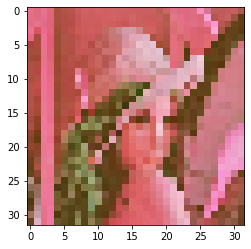

In [34]:
plt.imshow(Image)

In [35]:
qc_2 = QuantumCircuit(24, 20)
for i in range(12):
    qc_2.h(i)
    
for gate in QuantumGateDecList:
    gateLen = len(gate)
    for decomPose in gate:
        controlList = []
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc_2.x(int(key))
                controlList.append(int(key))
        controlList.append(decomPose[len(decomPose)-1])
        applyGate(qc_2, decomPose, controlList)
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc_2.x(int(key))
        qc_2.barrier()
        
#此处加了一个cnot算子，此时将R和G通道进行了交换
qc_2.x(0)
qc_2.cx(0, 1)

for i in range(12):
    qc_2.measure(i, 19 - i)

for j in range(8):
    qc_2.measure(16 + j, 7 - j)

In [37]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc_2, qasm_sim)
qobj = assemble(t_qc, shots=40000)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc_2)
print(counts)

{'00010000000001010000': 15, '00010000000101001011': 13, '00010000001001110001': 11, '00010000001101100110': 11, '00010000010001001000': 5, '00010000010101001111': 15, '00000001000001011110': 7, '00010000011001001111': 11, '00010000011101001011': 10, '00010000100001010010': 14, '00010000100101011011': 11, '00010000101001100101': 10, '00010000101101011000': 6, '00010000110001101101': 11, '00010000110110010111': 10, '00010000111010100001': 11, '00010000111110001101': 9, '00010001000010101001': 8, '00010001000110101100': 8, '00010001001010010100': 10, '00010001001110111000': 8, '00010001010010111000': 11, '00010001010101100110': 9, '00000001000101011111': 4, '00010001011001110100': 8, '00010001011110110011': 9, '00010001100010110111': 9, '00010001100111000110': 15, '00010001101000111111': 7, '00010001101100111010': 5, '00010001110000111000': 10, '00010001110101111000': 11, '00010001111001111100': 16, '00010001111101111011': 5, '00010010000001010001': 8, '00010010000101001001': 5, '0001001

In [38]:
bitPlane = []
for i in counts:
    bitPlane.append(i)

In [39]:
channel0_0 = {}
channel0_1 = {}
channel1_0 = {}
for element in bitPlane:
    if element[0:2] == '00':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_0[key] = val
    elif element[0:2] == '01':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_1[key] = val
    elif element[0:2] == '10':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel1_0[key] = val

In [40]:
channel_R = []
channel_G = []
channel_B = []
for i in range(1024):
    channel_R.append(channel0_0[i])
    channel_G.append(channel0_1[i])
    channel_B.append(channel1_0[i])  

In [41]:
channel_R = np.array(channel_R).reshape(32, 32, 1)
channel_G = np.array(channel_G).reshape(32, 32, 1)
channel_B = np.array(channel_B).reshape(32, 32, 1)

In [42]:
Image = np.dstack((channel_R, channel_G))
Image = np.dstack((Image, channel_B))

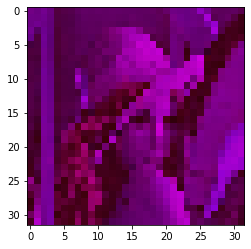

In [43]:
plt.imshow(Image)

In [52]:
qc_3 = QuantumCircuit(24, 20)
for i in range(12):
    qc_3.h(i)
    
for gate in QuantumGateDecList:
    gateLen = len(gate)
    for decomPose in gate:
        controlList = []
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc_3.x(int(key))
                controlList.append(int(key))
        controlList.append(decomPose[len(decomPose)-1])
        applyGate(qc_3, decomPose, controlList)
        for index in range(len(decomPose)-1):
            for key in decomPose[index].keys():
                if decomPose[index][key] == '0':
                    qc_3.x(int(key))
        qc_3.barrier()
        
#此处加了一个cnot算子，此时将R和G通道进行了交换
qc_3.x(1)
qc_3.cx(1, 0)

for i in range(12):
    qc_3.measure(i, 19 - i)

for j in range(8):
    qc_3.measure(16 + j, 7 - j)

In [53]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc_3, qasm_sim)
qobj = assemble(t_qc, shots=40000)
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc_3)
print(counts)

{'00010000000001000100': 10, '00010000000100111111': 9, '00010000001010001110': 7, '00010000001101111110': 12, '00010000010000110001': 15, '00010000010101000100': 11, '00000001000001100000': 14, '00010000011001001000': 5, '00010000011101000011': 11, '00010000100000111111': 14, '00010000100101010100': 7, '00010000101001011100': 7, '00010000101101001111': 8, '00010000110001110001': 6, '00010000110110011111': 6, '00010000111010101011': 14, '00010000111110010010': 6, '00010001000010110010': 10, '00010001000110110101': 13, '00010001001010011011': 6, '00010001001111000011': 7, '00010001010010111111': 14, '00010001010101111100': 7, '00000001000101100000': 11, '00010001011001110110': 10, '00010001011110111100': 11, '00010001100011000100': 6, '00010001100111010001': 9, '00010001101000010111': 11, '00010001101100010000': 5, '00010001110000001011': 9, '00010001110101111000': 10, '00010001111010001001': 11, '00010001111110000101': 12, '00010010000001000011': 7, '00010010000101000010': 6, '00010010

In [54]:
bitPlane = []
for i in counts:
    bitPlane.append(i)

In [55]:
channel0_0 = {}
channel0_1 = {}
channel1_0 = {}
for element in bitPlane:
    if element[0:2] == '00':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_0[key] = val
    elif element[0:2] == '01':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel0_1[key] = val
    elif element[0:2] == '10':
        key = int(element[2:12], 2)
        val = int(element[12:20], 2)
        channel1_0[key] = val

In [56]:
channel_R = []
channel_G = []
channel_B = []
for i in range(1024):
    channel_R.append(channel0_0[i])
    channel_G.append(channel0_1[i])
    channel_B.append(channel1_0[i])  

In [57]:
channel_R = np.array(channel_R).reshape(32, 32, 1)
channel_G = np.array(channel_G).reshape(32, 32, 1)
channel_B = np.array(channel_B).reshape(32, 32, 1)

In [58]:
Image = np.dstack((channel_R, channel_G))
Image = np.dstack((Image, channel_B))

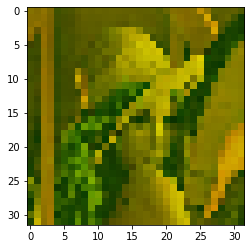

In [59]:
plt.imshow(Image)